<a href="https://colab.research.google.com/github/manikbali/gsics/blob/main/Create_SOB_Charts_MSG3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSICS State of Observing System Charts for Multiple Satellites


*By Manik Bali, ESSIC/UMD*

We present here a python platform built on Google Colab, aimed to help users use construct charts for State of Observing System Report.
There are three types of charts this script would build
1. Mean bias per channel between specified start and end dates
2. Time series of biases
3. Drifts

Input
The script takes GSICS RAC product as input. The input is provided in the form of list of Monitored instrument and corresponding Reference Instrument picked up from a single row of the product catalog. Ref and Monitored instruments acronyms of the Product catalog are used to construct the input list.  

**References**

EUMETSAT GSICS Product User Guide [link](https://www.eumetsat.int/website/wcm/idc/idcplg?IdcService=GET_FILE&dDocName=PDF_DMT_803180&RevisionSelectionMethod=LatestReleased&Rendition=Web)


**How to use this Notebook for the product you are interested in**

This notebook is for Product Type Re-Analysis Correction. For Product Type Near Real Time Correction click [here](https://colab.research.google.com/drive/18SjLpebRKPdEBT_eYuZrEGTQNo82gpn4)
1.   Make a copy of this notebook Click File-> Save a Copy in Drive
2.   Select the product/s from [product catalog](https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php) ( RAC product only) and pick the monitored and reference instrument acronyms and put these in the list ( **monlist** and **reflist**) below. Select multiple products by selecting their monitored and reference instruments and add them onto the monlist/reflist
3.  Under Runtime press Run All


monlist=List of acronyms of monitored instrument  pitcked from product catalog ( e.g. MSG-4 SEVIRI )


reflist=List of acronyms of reference instrument  picked from product catalog( e.g IASI-A)

**Sample**

monlist=['MSG-4 SEVIRI','MSG-3 SEVIRI']

reflist=['IASI-A','IASI-B']

**Enter startdate ='yyyymmdd' and enddate='yyyymmdd'**
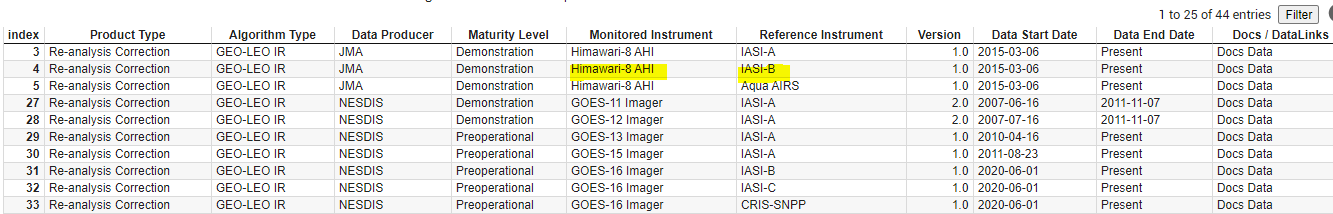

In [24]:
#%unload_ext google.colab.data_table
%load_ext google.colab.data_table
#%reload_ext google.colab.data_table
import requests
import pandas as pd
url = 'https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php' # URL of Product Catalog
html = requests.get(url).content
df_list = pd.read_html(html)
print("Select Monitored and Reference instrument from Product Catalog Table below and input them in monlist and reflist in the next cell")
tempdf=df_list[0].loc[df_list[0]['Product Type'].str.contains("analysis", case=False)]
productlist=tempdf[~tempdf['Product Type'].str.contains("dcc", case=False)]
productlist

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Select Monitored and Reference instrument from Product Catalog Table below and input them in monlist and reflist in the next cell


,Product Type,Algorithm Type,Data Producer,Maturity Level,Monitored Instrument,Reference Instrument,Version,Data Start Date,Data End Date,Docs / Data Links
5,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-8 AHI,IASI-A,1.0,2015-03-06,2021-10-15,Docs Data
6,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-8 AHI,IASI-B,1.0,2015-03-06,2022-11-29,Docs Data
7,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-9 AHI,IASI-B,1.0,2022-09-27,Present,Docs Data
8,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-8 AHI,Aqua AIRS,1.0,2015-03-06,2022-11-29,Docs Data
9,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-9 AHI,Aqua AIRS,1.0,2022-09-27,Present,Docs Data
27,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-1 SEVIRI,IASI-A,0.0,2008-06-01,2021-09-11,Docs Data
28,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-2 SEVIRI,IASI-A,0.0,2008-06-01,2021-09-11,Docs Data
29,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-3 SEVIRI,IASI-A,0.0,2012-08-12,2021-09-11,Docs Data
30,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-4 SEVIRI,IASI-A,0.0,2015-09-08,2021-09-11,Docs Data
31,Re-analysis Correction,GEO-LEO IR,NESDIS,Demonstration,GOES-11 Imager,IASI-A,2.0,2007-06-16,2011-11-07,Docs Data


In [25]:
#Visit the Product Catalog and copy paste the acronmys of Reference and Monitored instrument used there into the list below
#https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php
url = 'https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php' # URL of Product Catalog
#monlist=['Himawari-8 AHI','Himawari-8 AHI'] # Monitored instrument list. No limit to number of instruments you can specify
#reflist=['IASI-A','IASI-B'] # corresponding Reference instrument list. No limit to number of instruments you can specify
monlist=['MSG-4 SEVIRI','MSG-3 SEVIRI']
reflist=['IASI-A','IASI-B']
#2008-06-01	2021-11-16
startdate = '20130110' # Start date
enddate='20211116' # Enddate
lifetime='no' # lifetime ='yes' if you wish to computes mean bias, standard deviation and drift over the life time of the product. Start and end dates are ignored if done so.
flag='rac' # flag values RAC and Prime only

In [26]:
#Build dataframe of product catalog with catalog.html hyperlinks in it
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request

html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
headers = {    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')

parsed_table = soup.find_all('table')[0]
a=parsed_table.find_all('a',attrs = {"class": "NoImage"})
catfiles=pd.DataFrame([str(sfile).split(' ')[4].split('=')[1].split('>')[0][1:-1] for sfile in a[1:(len(a)+2):2]],columns=['caturls'])
catdf=pd.concat([df_list[0],catfiles],axis=1)

if(flag.lower()=='rac'):
  finaldf=catdf.loc[df['Product Type'].str.contains("analysis", case=False)]
  finaldf=finaldf[~finaldf['Product Type'].str.contains("prime", case=False)]
if(flag.lower()=='prime'):
  finaldf=catdf.loc[df['Product Type'].str.contains("prime", case=False)]
finaldf.set_index(['Monitored Instrument','Reference Instrument'],inplace=True)
#finaldf

In [27]:
print("List of Selected Products for this session[ Taken from Product Catalog]")
finaldf.loc[(monlist,reflist),:]

List of Selected Products for this session[ Taken from Product Catalog]


Product Type  \
Monitored Instrument Reference Instrument                           
MSG-4 SEVIRI         IASI-A                Re-analysis correction   
                     IASI-B                Re-analysis correction   
MSG-3 SEVIRI         IASI-A                Re-analysis Correction   
                     IASI-B                Re-analysis Correction   

                                          Algorithm Type Data Producer  \
Monitored Instrument Reference Instrument                                
MSG-4 SEVIRI         IASI-A                   GEO-LEO IR      EUMETSAT   
                     IASI-B                   GEO-LEO IR      EUMETSAT   
MSG-3 SEVIRI         IASI-A                   GEO-LEO IR      EUMETSAT   
                     IASI-B                   GEO-LEO IR      EUMETSAT   

                                          Maturity Level  Version  \
Monitored Instrument Reference Instrument                           
MSG-4 SEVIRI         IASI-A                  Operational      1.2   
                     IASI-B                  Operational      1.0   
MSG-3 SEVIRI         IASI-A                  Operational      1.0   
                     IASI-B                    Prototype      1.0   

                                          Data Start Date Data End Date  \
Monitored Instrument Reference Instrument                                 
MSG-4 SEVIRI         IASI-A                      6/1/2015    2021-11-16   
                     IASI-B                      6/1/2015       Present   
MSG-3 SEVIRI         IASI-A                    2013-01-10    2021-11-16   
                     IASI-B                    2013-01-10       Present   

                                          Docs / Data Links  \
Monitored Instrument Reference Instrument                     
MSG-4 SEVIRI         IASI-A                      Docs  Data   
                     IASI-B                      Docs  Data   
MSG-3 SEVIRI         IASI-A                      Docs  Data   
                     IASI-B                      Docs  Data   

                                                                                     caturls  
Monitored Instrument Reference Instrument                                                     
MSG-4 SEVIRI         IASI-A                http://gsics.eumetsat.int/thredds/catalog/msg4...  
                     IASI-B                http://gsics.eumetsat.int/thredds/catalog/msg4...  
MSG-3 SEVIRI         IASI-A                http://gsics.eumetsat.int/thredds/catalog/msg3...  
                     IASI-B                http://gsics.eumetsat.int/thredds/catalog/msg3...

In [28]:
#Extract hyperlinks of the product files
#select the latest files and ignore the rest
urls=list(finaldf.loc[(monlist,reflist),:]['caturls'].values )

latestfiles=[pd.DataFrame(pd.read_html(requests.get(catalogs).content)[-1]).set_index(['Last Modified']).values[-1][0] for catalogs in urls] #get the most recently modifies filename

#list(finaldf.loc[('MSG-4 SEVIRI',['IASI-A']),:]['caturls'].values )
fileurls=[]
print( "List of All the files on the catalog.html: Only the latest ones would be picked up" )
for url in urls:
  basen=url.split('/')
  basen.insert(basen.index('thredds')+1,'fileServer')
  basen.remove("catalog")
  s='/'
  req = requests.get(url, headers)
  soup = BeautifulSoup(req.content, 'html.parser')
  urllist=[]
  filelist=[]
  nrtfiles=[]
#  print(basen)
  testbasen=basen.copy()
  for a in soup.find_all('a', href=True):
        if((np.size(a['href'].split('/')) ==2 )  ):
              fname=a.text
              basen[-1] = a.text
#              print(basen)
              print(s.join(basen))

              fileurl=s.join(basen)
              urllist.append(fileurl)
              if( fname in latestfiles):
                fileurls.append(fileurl)
              filelist.append(a.text)
              urllib.request.urlretrieve(fileurl, fname)
#              break

List of All the files on the catalog.html: Only the latest ones would be picked up
http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpA+IASI_C_EUMG_20190930144500_02.nc
http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpA+IASI_C_EUMG_20150601000000_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpA+IASI_C_EUMG_20190930144500_02.nc
http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpA+IASI_C_EUMG_20130110000000_01.nc
http://gsics.eumetsat.int/thredds/fileServer/ms

In [29]:
print("List of selected files on the catalog.html for calculating bias and drift. The most recently modifies files are selected")
print("Files with the most recent modification date would be picked up. ")
print("If you wish to make your own selection comment out the line below and enter your own url's")

#fileurl=['url1','url2'..]
fileurls


List of selected files on the catalog.html for calculating bias and drift. The most recently modifies files are selected
Files with the most recent modification date would be picked up. 
If you wish to make your own selection comment out the line below and enter your own url's


['http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpA+IASI_C_EUMG_20150601000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpA+IASI_C_EUMG_20130110000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc']

In [30]:
!pip install netCDF4
!pip install julian
!pip install cftime
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc4
import matplotlib.pyplot as plt
import julian,os
from cftime import num2pydate
from datetime import datetime
from tabulate import tabulate
from IPython.display import display, HTML


http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpA+IASI_C_EUMG_20150601000000_01.nc
15715 16587 18947 18185
You Start and Enddates are outside the range of the product 20130110 20211116
Please Enter Start and End Date between 2015-06-01 00:00:00 2019-10-16 00:00:00
[MSG4 SEVIRI - MetOpA IASI]


,3.913 μm,6.265 μm,7.344 μm,8.715 μm,9.663 μm,10.74 μm,11.917 μm,13.359 μm
Standard Scene Temp (K),284.000000,236.000000,255.000000,284.000000,261.000000,286.000000,285.000000,267.000000
Tb Bias (K),0.072485,-0.081975,0.227746,-0.002315,0.151698,0.088944,-0.025746,-0.219760
Std Dev (K),0.179623,0.045022,0.051754,0.079220,0.067085,0.041517,0.044725,0.310292
Drift (K),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc
15715 16587 18947 19526
You Start and Enddates are outside the range of the product 20130110 20211116
Please Enter Start and End Date between 2015-06-01 00:00:00 2023-06-18 00:00:00
[MSG4 SEVIRI - MetOpB IASI]


,3.913 μm,6.265 μm,7.344 μm,8.715 μm,9.663 μm,10.74 μm,11.917 μm,13.359 μm
Standard Scene Temp (K),284.000000,236.000000,255.000000,284.000000,261.000000,286.000000,285.000000,267.000000
Tb Bias (K),0.061804,-0.056680,0.224055,-0.014182,0.134013,0.075665,-0.043361,-0.278313
Std Dev (K),0.135099,0.050915,0.046921,0.078006,0.050060,0.043597,0.044245,0.273252
Drift (K),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopa-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpA+IASI_C_EUMG_20130110000000_01.nc
15715 15715 18947 18202
You Start and Enddates are outside the range of the product 20130110 20211116
Please Enter Start and End Date between 2013-01-10 00:00:00 2019-11-02 00:00:00
[MSG3 SEVIRI - MetOpA IASI]


,3.925 μm,6.267 μm,7.351 μm,8.71 μm,9.664 μm,10.755 μm,11.924 μm,13.322 μm
Standard Scene Temp (K),284.000000,236.00000,255.000000,284.000000,261.000000,286.000000,285.000000,267.000000
Tb Bias (K),0.447838,-0.19042,0.108430,-0.012661,0.035365,0.042574,0.035134,-1.173941
Std Dev (K),0.205568,0.08109,0.084201,0.073131,0.090120,0.048199,0.043258,0.461311
Drift (K),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc
15715 15715 18947 19526
[MSG3 SEVIRI - MetOpB IASI]


,3.925 μm,6.267 μm,7.351 μm,8.71 μm,9.664 μm,10.755 μm,11.924 μm,13.322 μm
Standard Scene Temp (K),284.000000,236.000000,255.000000,284.000000,261.000000,286.000000,285.000000,267.000000
Tb Bias (K),0.475590,-0.200569,0.082618,0.001933,0.027511,0.035249,0.023357,-1.197510
Std Dev (K),0.186738,0.066144,0.081036,0.072382,0.103703,0.055284,0.057696,0.445223
Drift (K),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


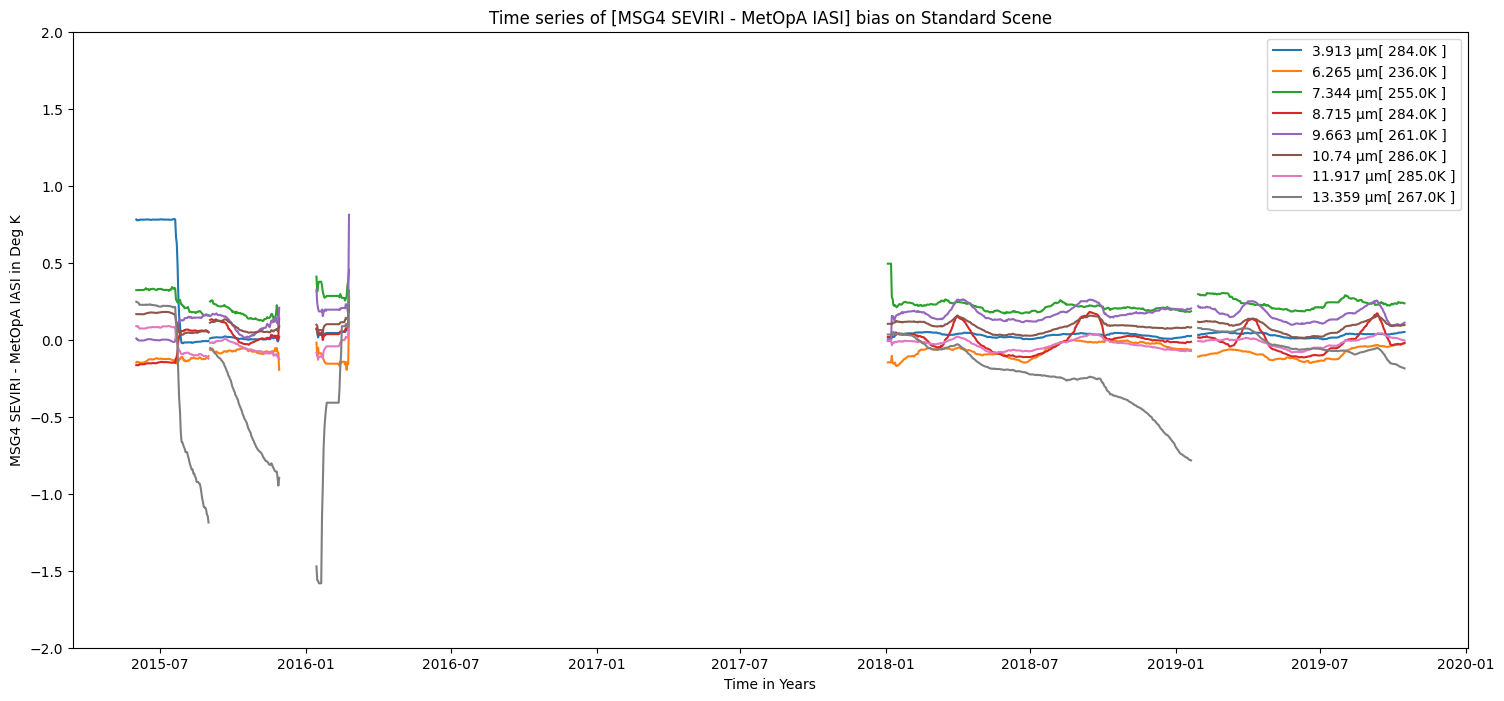

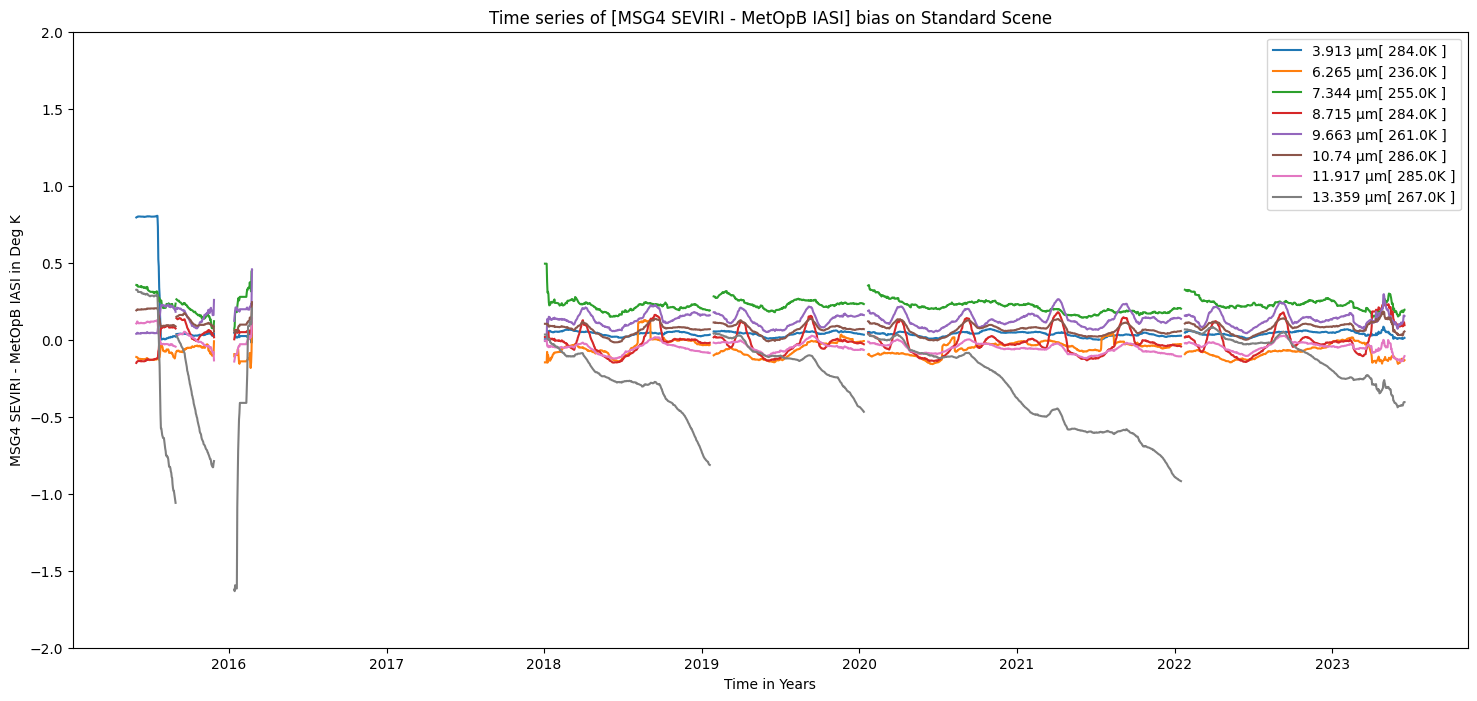

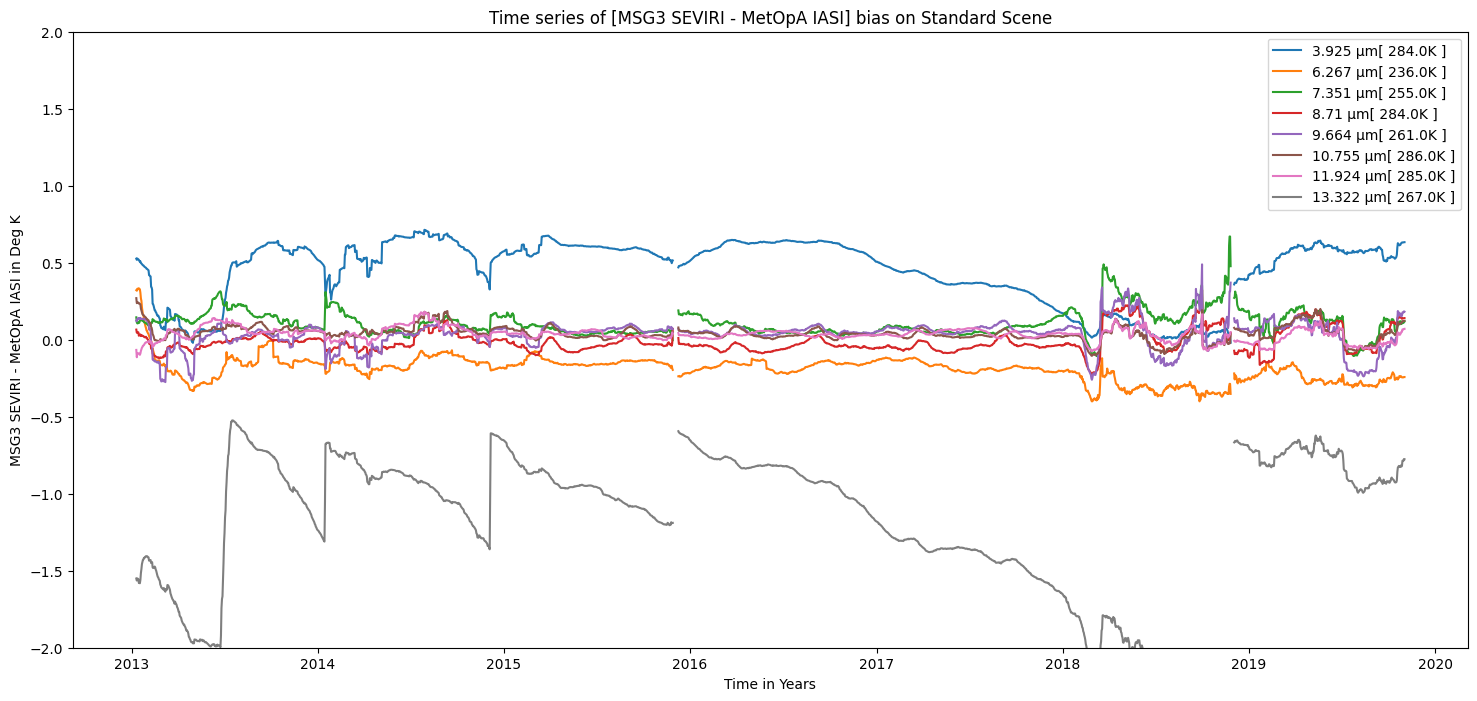

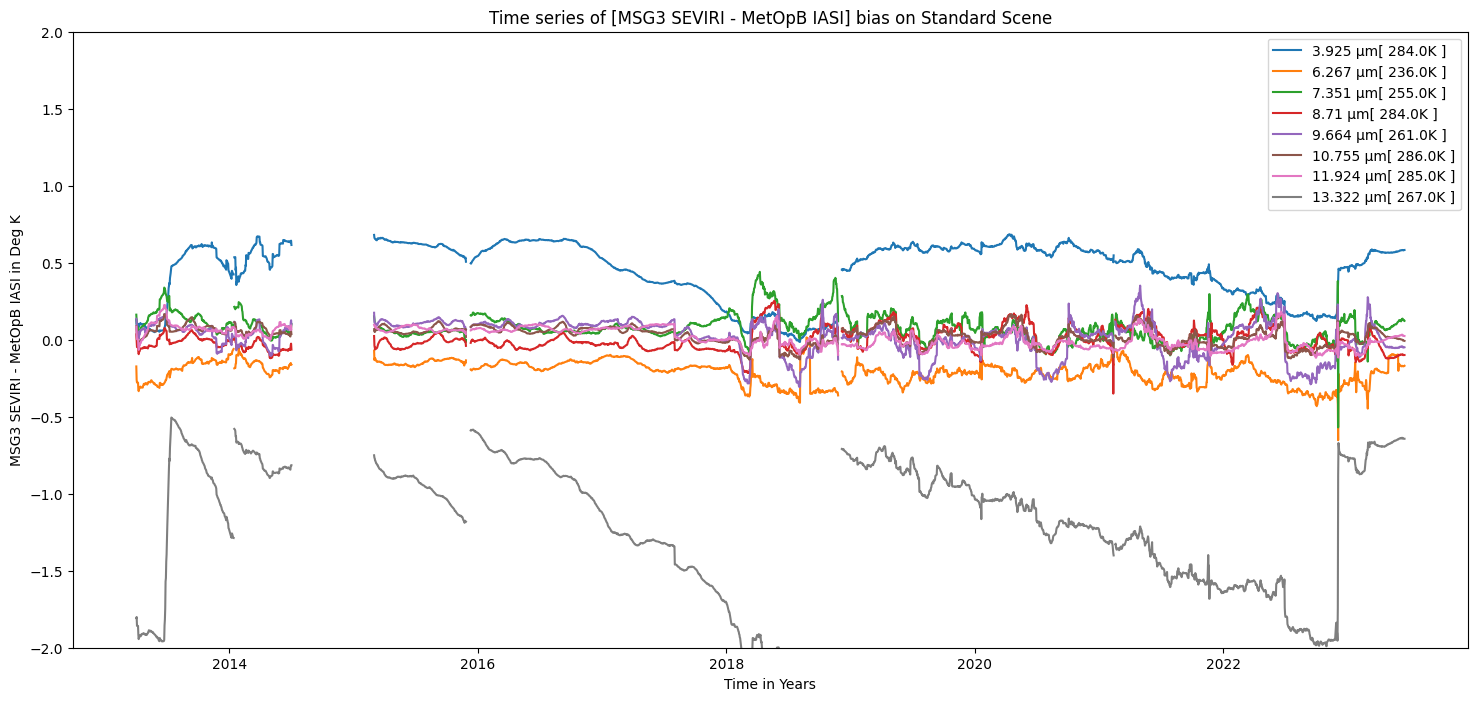

In [31]:
#Loop over product netcdf files, extract variables and plot
# Open the GSICS netCDF file and read variables [ You can add in more]
alllist = []
tcaptions=[]
for url in fileurls:
  print(url)
  url1, nc_file=  os.path.split(url)
  urllib.request.urlretrieve(url, nc_file)
  with nc4.Dataset(nc_file,'r') as ncid:
    std_bias      = ncid.variables['std_scene_tb_bias'][:][:] # Standard Scene TB Bias
    if ('CMA' in nc_file):
      time_array    = ncid.variables['date'][:,0] #time
    else:
      time_array    = ncid.variables['date'][:] #time
    freq_array    = ncid.variables['wnc'][:] #wnc
    std_scene_tb    = ncid.variables['std_scene_tb'][:] # Scene TB
    # delta_slope    = ncid.variables['delta_slope'][:] # Slope
    # delta_offset    = ncid.variables['offset'][:] # Offset
    # reference_name    = ncid.variables['reference_name'][:] # Refname
    alpha             = ncid.variables['alpha'][:] # Alpha
    beta              = ncid.variables['beta'][:] # Beta
    br0              = ncid.variables['slope'][:] # Slope
    ar0              = ncid.variables['offset'][:] # Offset
    time_array =time_array/86400.0
  ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene"
  if "PRIME" in (nc4.Dataset(nc_file,'r').id):
      ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene [PRIME]"
  else:
      ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene"
  ytitle=nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument +" in Deg K"

#Construct a data frame with observation days in the first column
#However this has missing days and at time repeated days.
  dtime_days=pd.DataFrame(time_array.astype(int),columns=list('t'))
  std_df = pd.DataFrame(std_bias)
  std_df.columns.name = 'standard_scene_bias'

  std_df.columns=freq_array
  df_time_std_bias=[dtime_days,std_df]
  df_time_bias=pd.concat(df_time_std_bias,axis=1) # Data Frame with time information added in column

#Construct a data time series such that days are evenly placed
#However this has missing days. Fill Nan on these days. Also drop duplicate days if any

#  print(time_array[0].astype(int),time_array[-1].astype(int))
  new_index = pd.Index(np.arange(time_array[0].astype(int),time_array[-1].astype(int)), name="t")
  temp=df_time_bias.drop_duplicates(subset=['t'])


  df_index=temp.set_index("t")
  df_reindex=temp.set_index("t").reindex(new_index)
  df_array=df_reindex.to_numpy()

  sdate = datetime.strptime(startdate,'%Y%m%d')
  edate = datetime.strptime(enddate,'%Y%m%d')

  sdays=(datetime(sdate.year,sdate.month,sdate.day) - datetime(1970,1,1)).days
  edays=(datetime(edate.year,edate.month,edate.day) - datetime(1970,1,1)).days
  if(lifetime.lower()=='yes'):
    sdays=new_index[0]
    edays=new_index[-1]
  cf=10000/np.array(freq_array)
  cf=np.around(cf,decimals=3)
  cfreq = [[str(freq)] + [u"\u03bcm"] for freq in cf  ]
  cfreq = [ ' '.join(freq) for freq in cfreq ]
  print(sdays,df_reindex.index[0],edays , df_reindex.index[-1])
  if((sdays < df_reindex.index[0]) or (edays > df_reindex.index[-1])):
    print("You Start and Enddates are outside the range of the product", startdate, enddate)
    print("Please Enter Start and End Date between",pd.to_datetime(df_reindex.index[0], unit="d"),pd.to_datetime(df_reindex.index[-1], unit="d") )
  tablecaption="["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "]"
  sstb=pd.DataFrame(np.array(std_scene_tb).reshape(1,len(cf)), columns=cfreq)
  meandf=pd.DataFrame(df_reindex.loc[sdays:edays].mean( ).to_numpy().reshape(1,len(cf)), columns=cfreq)
  stddf=pd.DataFrame(df_reindex.loc[sdays:edays].std( ).to_numpy().reshape(1,len(cf)), columns=cfreq)

  #Calculate drift [implimented from Tim Hewison@eumetsat]
  driftdf=pd.DataFrame(np.array([np.polyfit(df_index.loc[sdays:edays].index.to_numpy(), df_index.loc[sdays:edays].to_numpy()[:,i] , 1)[0]*365.24 for i in range(len(cf)) ] ).reshape(1,len(cf)), columns=cfreq)


  sstb.rename(index={0:'Standard Scene Temp (K)'},inplace=True)
  meandf.rename(index={0:'Tb Bias (K)'},inplace=True)
  stddf.rename(index={0:'Std Dev (K)'},inplace=True)
  driftdf.rename(index={0:'Drift (K)'},inplace=True)
  tcaptions.append(tablecaption)
  meanstddf=pd.concat([sstb,meandf,stddf,driftdf])
  meanstddf.style.set_caption(tablecaption).format("{:.2}")

  print("\033[1m" + tablecaption + "\033[0m")
#  print(tablecaption)

  display(HTML(meanstddf.to_html()))
  plt.figure(figsize=(18,8))
  plt.ylim(-2, 2)
  cfreq=[ ''.join(cfreq[fr] +"[ " + str(std_scene_tb[fr])+ "K ]") for fr in range(len(cfreq))]
  days_since1970=num2pydate(df_reindex.index,'days since 1970-01-01')
  plt.plot(days_since1970,df_array)
  plt.title(ttitle)
  plt.xlabel('Time in Years')
  plt.ylabel(ytitle)
  plt.legend(cfreq)
  alllist.append(meanstddf)
#  print(meandf.to_markdown())




```
# This is formatted as code
```




In [21]:
alldf=pd.concat(alllist,axis=1,keys=tcaptions)
alldf.style.format('{:.2f}')
#display(alldf.style.set_caption(tablecaption).format("{2:.2}"))
#meanstddf

In [22]:
from IPython.display import display, HTML
print(std_scene_tb)
display(HTML(alldf.to_html()))

[284. 236. 255. 284. 261. 286. 285. 267.]
